In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob
file_pattern = r"part-0000*.csv"
all_files = glob.glob(file_pattern)
data = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

In [3]:
#show all columns
pd.set_option('display.max_columns', None)
data.columns
data['cluster']= data['cluster']+1

In [4]:
data.columns

Index(['Origin', 'Season', 'DayOfWeek', 'OriginState', 'OriginStateName',
       'Dest', 'DestCityName', 'DestState', 'DestStateName',
       'Reporting_Airline', 'cluster', 'DivertedFlights', 'TotalFlights',
       'DepartureDelayedFlights', 'ArrivalDelayedFlights',
       'TotalDepDelay_gt_15M', 'TotalArrDelay_gt_15M', 'TotalDepDelay',
       'TotalArrDelay', 'TotalCarrierDelay', 'TotalWeatherDelay',
       'TotalNASDelay', 'TotalSecurityDelay', 'TotalLateAircraftDelay'],
      dtype='object')

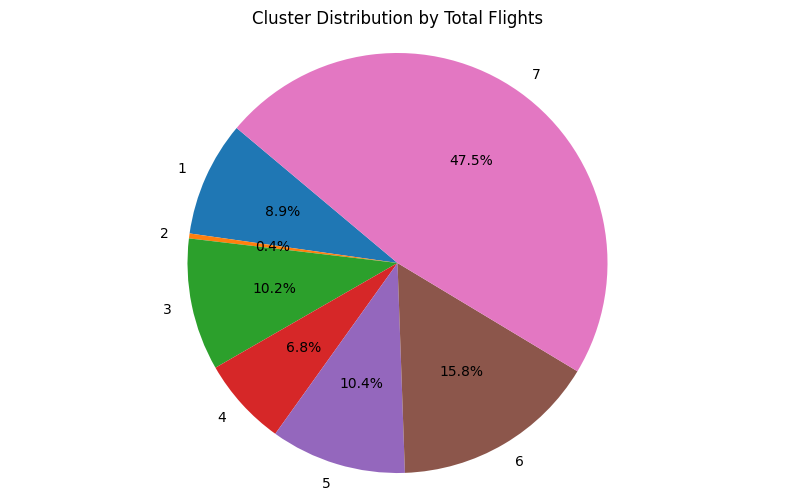

In [5]:
# Plot pie chart of each cluster by sum(total_flights)
def plot_pie_chart(data, column, title):
    # Calculate the sum of total_flights for each cluster
    cluster_counts = data.groupby(column)['TotalFlights'].sum()

    # Create a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
# Plot pie chart for each cluster
plot_pie_chart(data, 'cluster', 'Cluster Distribution by Total Flights')


In [6]:
#sum total flights per cluster
cluster_summary = data.groupby('cluster').agg({
    'TotalFlights': 'sum',
    'ArrivalDelayedFlights': 'sum'
}).reset_index()
print("Cluster Summary:")
print(cluster_summary)

# Optional: Calculate percentage of delayed flights
cluster_summary['DelayPercentage'] = (cluster_summary['ArrivalDelayedFlights'] / cluster_summary['TotalFlights'] * 100).round(2)
# Display with percentage
print("\nCluster Summary with Delay Percentage:")
print(cluster_summary)

Cluster Summary:
   cluster  TotalFlights  ArrivalDelayedFlights
0        1        618899               269965.0
1        2         26423                 4705.0
2        3        710623                70262.0
3        4        475399               102217.0
4        5        729514                65656.0
5        6       1104295               236095.0
6        7       3317593               701066.0

Cluster Summary with Delay Percentage:
   cluster  TotalFlights  ArrivalDelayedFlights  DelayPercentage
0        1        618899               269965.0            43.62
1        2         26423                 4705.0            17.81
2        3        710623                70262.0             9.89
3        4        475399               102217.0            21.50
4        5        729514                65656.0             9.00
5        6       1104295               236095.0            21.38
6        7       3317593               701066.0            21.13


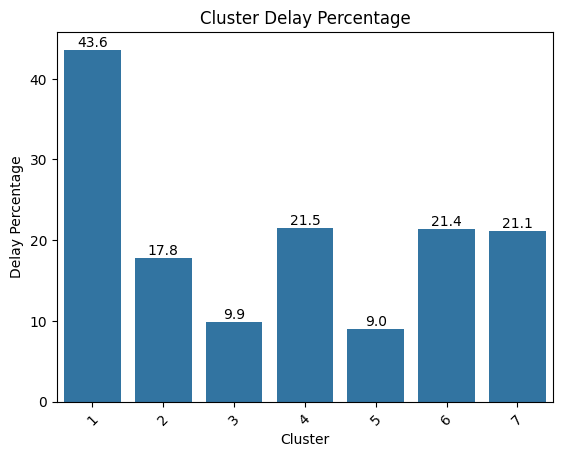

In [7]:
#Plot bar chart of each cluster by delay percentage with data labels

def plot_bar_chart(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()
# Add data labels to the bar chart
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', rotation=0)

    return ax
# Create the bar plot
ax = sns.barplot(x='cluster', y='DelayPercentage', data=cluster_summary)
# Add data labels
ax = add_data_labels(ax)
plt.title('Cluster Delay Percentage')
plt.xlabel('Cluster')
plt.ylabel('Delay Percentage')
plt.xticks(rotation=45) 
plt.show()


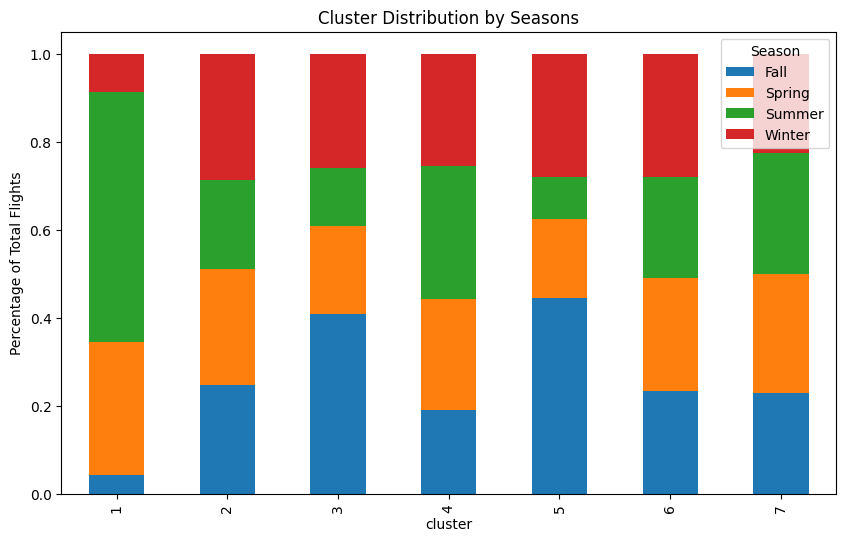

In [8]:
#Plot 100% stacked bar chart of each cluster by seasons
def plot_stacked_bar_chart(data, x_column, y_column, title):
    # Create a pivot table for the stacked bar chart
    pivot_data = data.pivot_table(index=x_column, columns=y_column, values='TotalFlights', aggfunc='sum', fill_value=0)

    # Normalize the data to get percentages
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    pivot_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Percentage of Total Flights')
    plt.legend(title=y_column)
    plt.show()
# Plot stacked bar chart for each cluster by seasons
plot_stacked_bar_chart(data, 'cluster', 'Season', 'Cluster Distribution by Seasons')



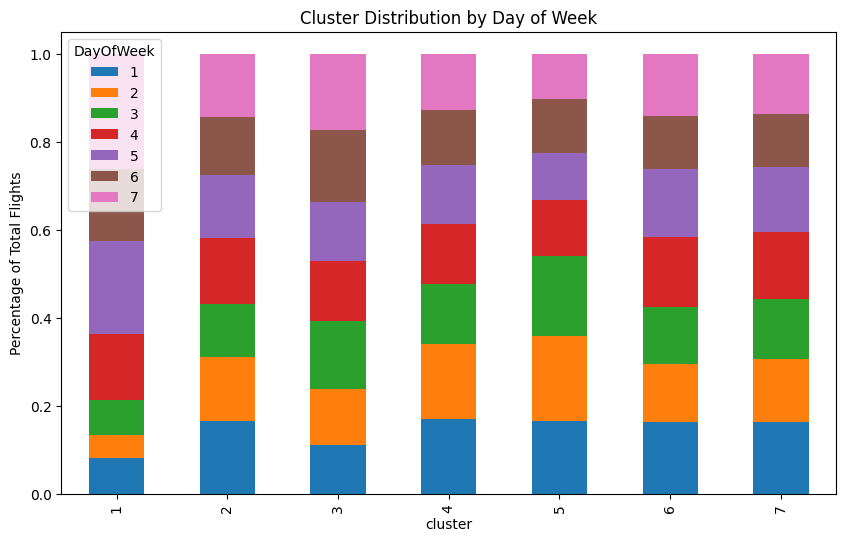

In [9]:
#Cluster Distribution by Day of Week 100% Stacked Bar Chart
def plot_stacked_bar_chart(data, x_column, y_column, title):
    # Create a pivot table for the stacked bar chart
    pivot_data = data.pivot_table(index=x_column, columns=y_column, values='TotalFlights', aggfunc='sum', fill_value=0)

    # Normalize the data to get percentages
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    pivot_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Percentage of Total Flights')
    plt.legend(title=y_column)
    plt.show()
# Plot stacked bar chart for each cluster by Day of Week
plot_stacked_bar_chart(data, 'cluster', 'DayOfWeek', 'Cluster Distribution by Day of Week')

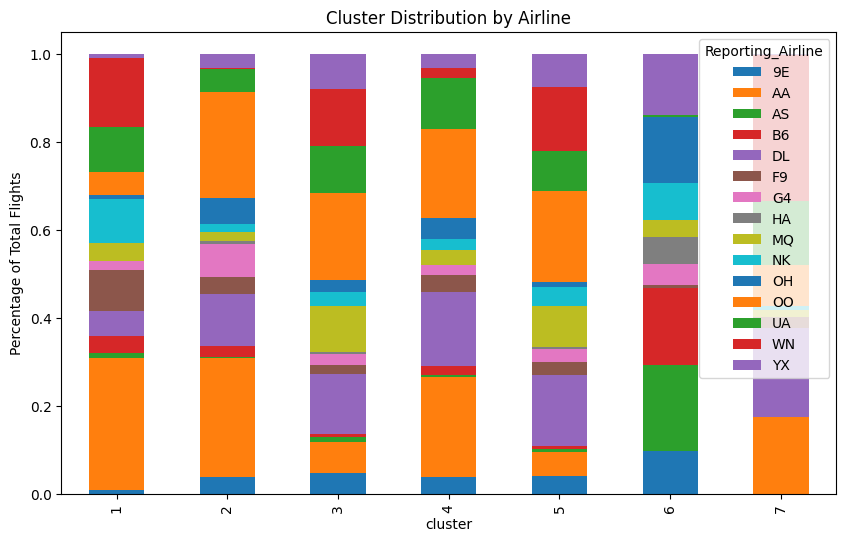

In [10]:
#Cluster Distribution by Airline 100% Stacked Bar Chart
def plot_stacked_bar_chart(data, x_column, y_column, title):
    # Create a pivot table for the stacked bar chart
    pivot_data = data.pivot_table(index=x_column, columns=y_column, values='TotalFlights', aggfunc='sum', fill_value=0)

    # Normalize the data to get percentages
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    pivot_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Percentage of Total Flights')
    plt.legend(title=y_column)
    plt.show()
# Plot stacked bar chart for each cluster by Airline
plot_stacked_bar_chart(data, 'cluster', 'Reporting_Airline', 'Cluster Distribution by Airline')

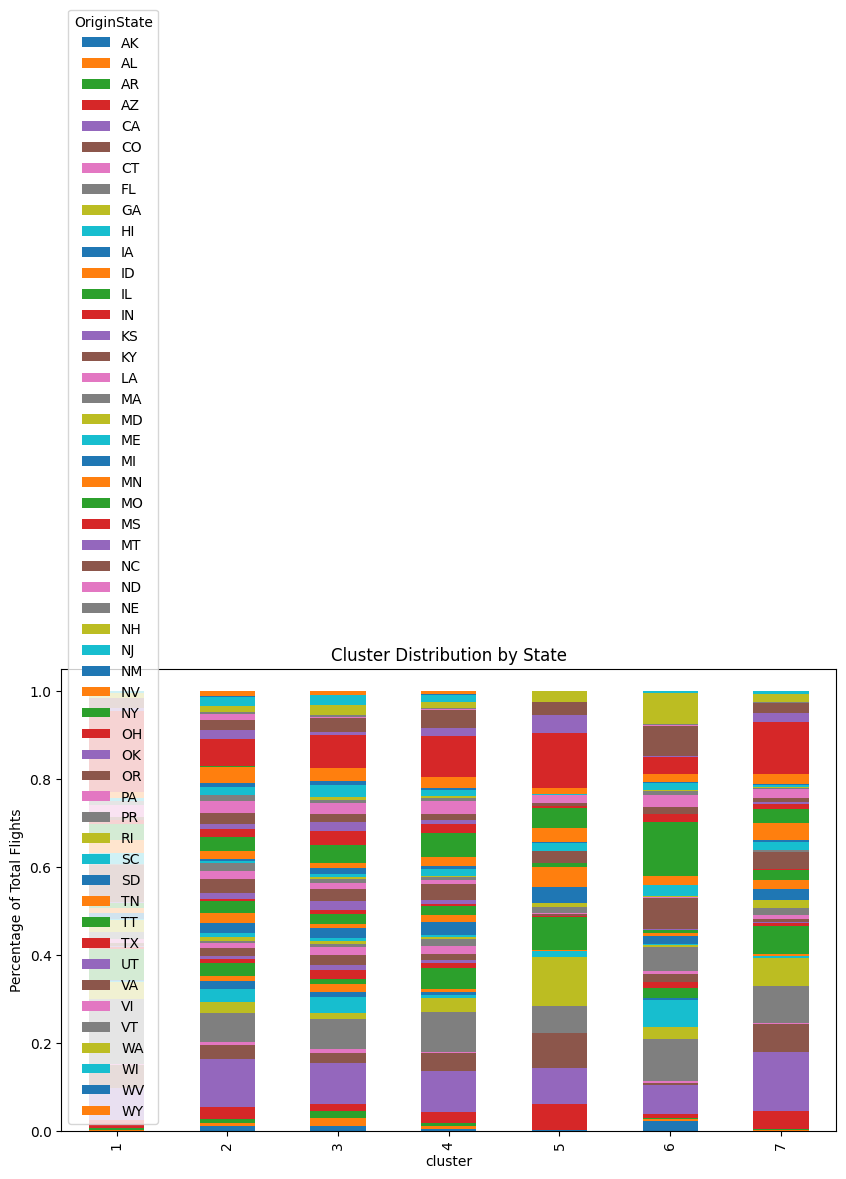

In [11]:
#Cluster Distribution by State 100% Stacked Bar Chart
def plot_stacked_bar_chart(data, x_column, y_column, title):
    # Create a pivot table for the stacked bar chart
    pivot_data = data.pivot_table(index=x_column, columns=y_column, values='TotalFlights', aggfunc='sum', fill_value=0)

    # Normalize the data to get percentages
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    pivot_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Percentage of Total Flights')
    plt.legend(title=y_column)
    plt.show()
# Plot stacked bar chart for each cluster by State
plot_stacked_bar_chart(data, 'cluster', 'OriginState', 'Cluster Distribution by State')

In [12]:
#Print summary top 5 airlines by total flights by cluster
def print_top_airlines_by_cluster(data, cluster_column, airline_column, flights_column, top_n=5):
    # Group by cluster and airline, then sum the total flights
    cluster_airline_summary = data.groupby([cluster_column, airline_column])[flights_column].sum().reset_index()

    # Sort the summary by cluster and total flights
    sorted_summary = cluster_airline_summary.sort_values(by=[cluster_column, flights_column], ascending=[True, False])

    # Print the top N airlines for each cluster
    for cluster in sorted_summary[cluster_column].unique():
        print(f"\nTop {top_n} Airlines for Cluster {cluster}:")
        top_airlines = sorted_summary[sorted_summary[cluster_column] == cluster].head(top_n)
        print(top_airlines)
# Call the function to print the top airlines by cluster
print_top_airlines_by_cluster(data, 'cluster', 'Reporting_Airline', 'TotalFlights', top_n=5)


Top 5 Airlines for Cluster 1:
    cluster Reporting_Airline  TotalFlights
1         1                AA        185125
13        1                WN         97071
12        1                UA         63488
9         1                NK         62066
5         1                F9         57854

Top 5 Airlines for Cluster 2:
    cluster Reporting_Airline  TotalFlights
16        2                AA          7100
26        2                OO          6319
19        2                DL          3154
21        2                G4          1980
25        2                OH          1608

Top 5 Airlines for Cluster 3:
    cluster Reporting_Airline  TotalFlights
41        3                OO        139779
34        3                DL         95983
43        3                WN         91970
42        3                UA         76477
38        3                MQ         73034

Top 5 Airlines for Cluster 4:
    cluster Reporting_Airline  TotalFlights
46        4                AA        107

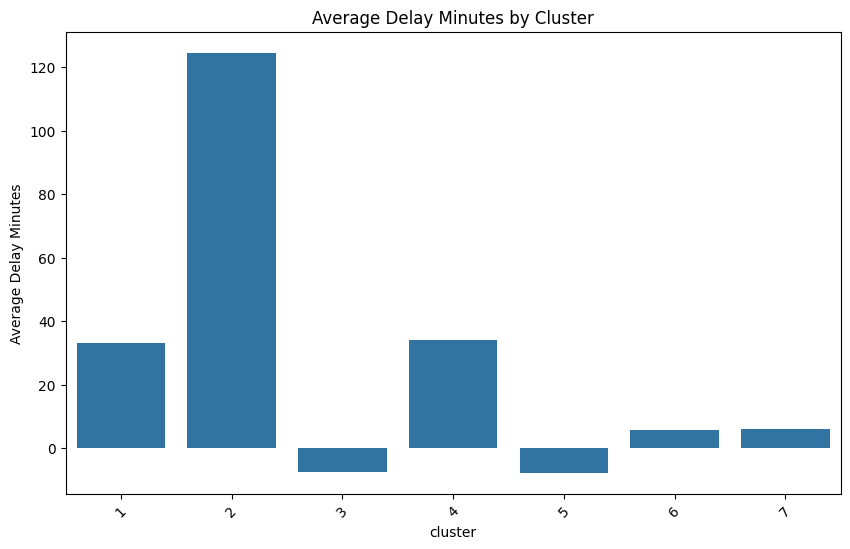

In [13]:
#Average Delay Minutes by Cluster ('ArrivalDelayMinutes'/'TotalFlights')
def plot_average_delay_by_cluster(data, cluster_column, delay_column, flights_column, title):
    # Calculate the average delay minutes per flight for each cluster
    data['AverageDelayMinutes'] = data[delay_column] / data[flights_column]
    average_delay = data.groupby(cluster_column)['AverageDelayMinutes'].mean().reset_index()

    # Plot the average delay by cluster
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_column, y='AverageDelayMinutes', data=average_delay)
    plt.title(title)
    plt.xlabel(cluster_column)
    plt.ylabel('Average Delay Minutes')
    plt.xticks(rotation=45)
    plt.show()
# Call the function to plot average delay by cluster
plot_average_delay_by_cluster(data, 'cluster', 'TotalArrDelay', 'TotalFlights', 'Average Delay Minutes by Cluster')

In [30]:
#Top 5 Routes in Each Cluster by Total Flight Count
top_routes_per_cluster = (
    data.groupby(['cluster', 'Origin', 'Dest'])
    .size()
    .reset_index(name='flight_count')
    .sort_values(['cluster', 'flight_count'], ascending=[True, False])
)

top_5_routes_each_cluster = (
    top_routes_per_cluster.groupby('cluster')
    .head(5)
    .reset_index(drop=True)
)


for cluster_id, group_df in top_5_routes_each_cluster.groupby("cluster"):
    print(f"\nTop 5 Routes in Cluster {cluster_id}")
    display(group_df.reset_index(drop=True))



Top 5 Routes in Cluster 1


,cluster,Origin,Dest,flight_count
0,1,LAX,SFO,71
1,1,SAN,SFO,70
2,1,PHX,SFO,58
3,1,LAS,SFO,56
4,1,ORD,ATL,51



Top 5 Routes in Cluster 2


,cluster,Origin,Dest,flight_count
0,2,LAX,PRC,10
1,2,DVL,DEN,7
2,2,SNA,CLT,7
3,2,SNA,MIA,7
4,2,AUS,DFW,6



Top 5 Routes in Cluster 3


,cluster,Origin,Dest,flight_count
0,3,LIH,LAX,79
1,3,OGG,LAX,77
2,3,BDL,ORD,72
3,3,DSM,ORD,72
4,3,BFL,PHX,68



Top 5 Routes in Cluster 4


,cluster,Origin,Dest,flight_count
0,4,SGF,ORD,24
1,4,LBB,DFW,23
2,4,LGA,IAH,23
3,4,DTW,ORD,21
4,4,PHX,JFK,21



Top 5 Routes in Cluster 5


,cluster,Origin,Dest,flight_count
0,5,LAX,LIH,81
1,5,PHX,BFL,69
2,5,LAX,OGG,59
3,5,DTW,PHL,58
4,5,PHX,ELP,56



Top 5 Routes in Cluster 6


,cluster,Origin,Dest,flight_count
0,6,JFK,RDU,69
1,6,DCA,RDU,66
2,6,RDU,DCA,66
3,6,RDU,JFK,62
4,6,EWR,LAX,59



Top 5 Routes in Cluster 7


,cluster,Origin,Dest,flight_count
0,7,LAS,LAX,130
1,7,LAX,LAS,124
2,7,SFO,LAX,110
3,7,LAX,DEN,109
4,7,DEN,MSP,104


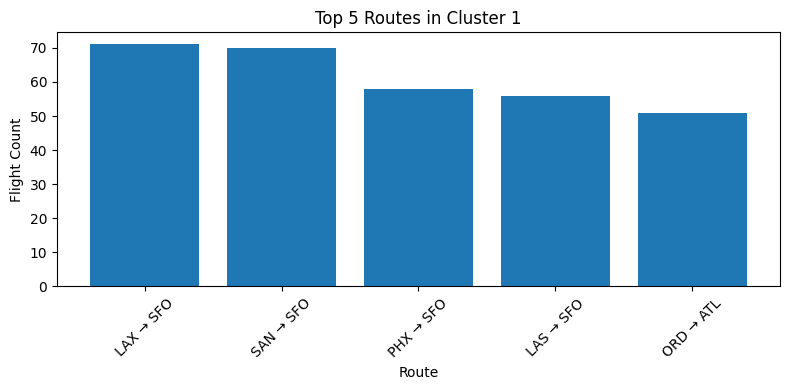

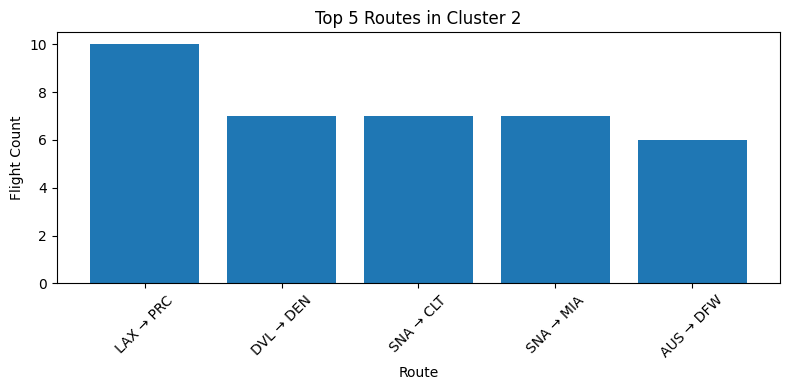

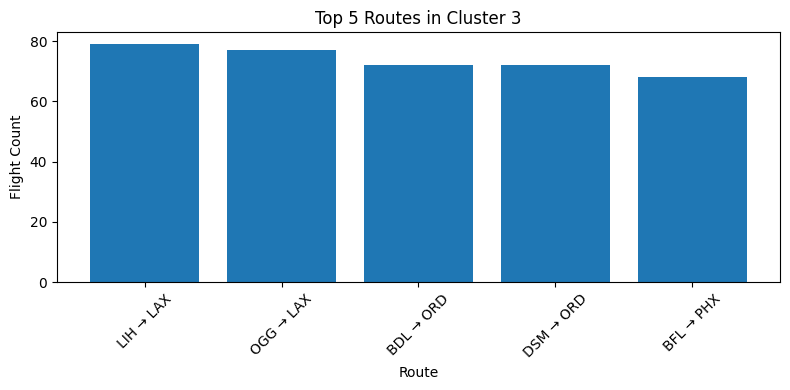

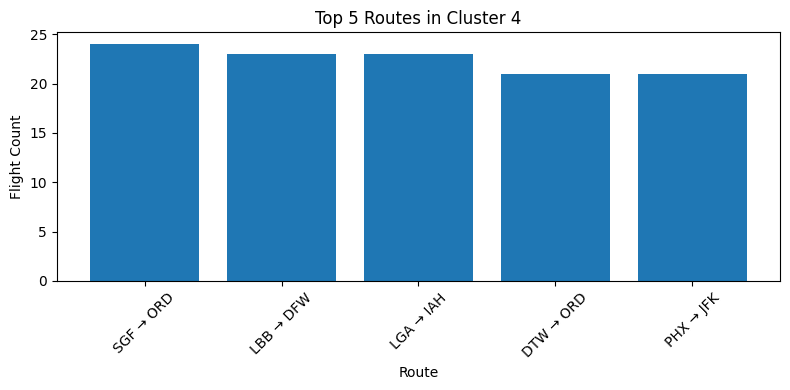

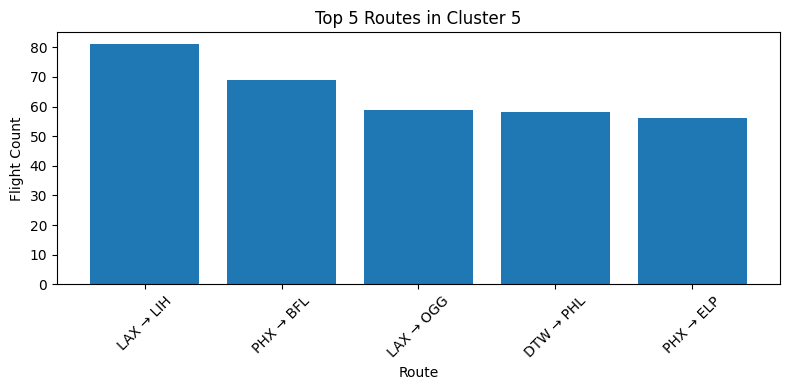

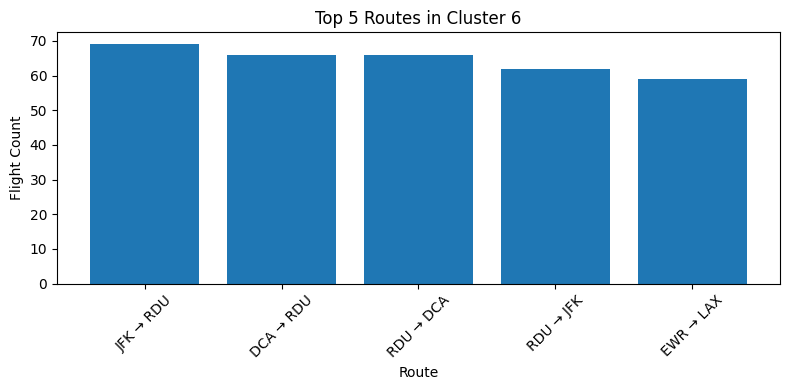

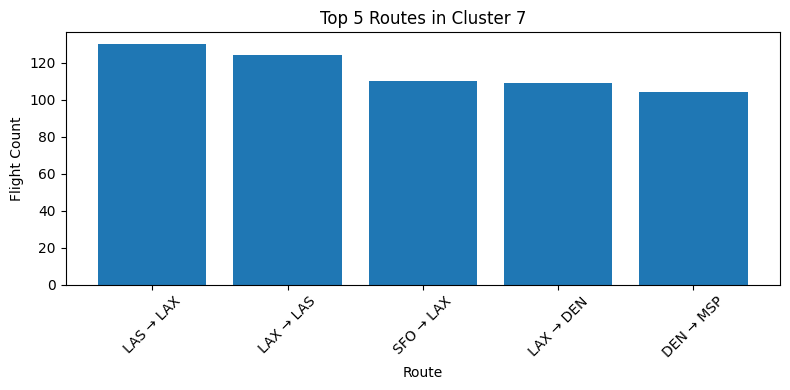

In [18]:
import matplotlib.pyplot as plt

for cluster_id, group_df in top_5_routes_each_cluster.groupby("cluster"):
    plt.figure(figsize=(8, 4))
    route_labels = group_df['Origin'] + " → " + group_df['Dest']
    plt.bar(route_labels, group_df['flight_count'])
    plt.title(f"Top 5 Routes in Cluster {cluster_id}")
    plt.ylabel("Flight Count")
    plt.xlabel("Route")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [29]:
#Top 5 Destination Airports by Total Flight Count
top_5_destinations = (
    data['Dest']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Dest', 'Dest': 'flight_count'})
)

display(top_5_destinations)


,flight_count,count
0,ORD,11134
1,DEN,9806
2,DFW,9780
3,ATL,8527
4,PHX,6710


In [23]:
#Top 5 Origin Airports by Total Flight Count
top_5_origins = (
    data['Origin']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Origin', 'Origin': 'flight_count'})
)

display(top_5_origins)


,flight_count,count
0,ORD,11125
1,DEN,9804
2,DFW,9766
3,ATL,8525
4,PHX,6702
